# Laptop Price Prediction

## Importing necessary libraries and dataset

In [1944]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1946]:
laptop_data=pd.read_csv('laptop.csv')

In [1948]:
laptop_data.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [1950]:
#info shows the datatypes and number of null values
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [1952]:
#no of rows * no of columns
laptop_data.shape

(1303, 13)

In [1954]:
laptop_data.describe(include='all')

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
count,1303.00000,1273.000000,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273.000000
unique,NaN,NaN,19,6,25,40,118,10,40,110,9,189,NaN
top,NaN,NaN,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,NaN,290,710,640,495,183,601,401,271,1047,111,NaN
mean,651.00000,652.674784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59955.814073
std,376.28801,376.493027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37332.251005
min,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9270.720000
25%,325.50000,327.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31914.720000
50%,651.00000,652.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52161.120000
75%,976.50000,980.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79333.387200


In [1956]:
#dropping undesired columns
laptop_data.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

In [1958]:
laptop_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [1960]:
laptop_data.shape

(1303, 11)

## Handling Duplicates

In [1962]:
laptop_data.duplicated().sum()

58

In [1964]:
laptop_data.drop_duplicates(inplace=True)

In [1966]:
laptop_data.shape

(1245, 11)

## Handling Null Values

In [1968]:
laptop_data.isnull().sum()

Company             1
TypeName            1
Inches              1
ScreenResolution    1
Cpu                 1
Ram                 1
Memory              1
Gpu                 1
OpSys               1
Weight              1
Price               1
dtype: int64

In [1970]:
laptop_data.dropna(inplace=True)

In [1972]:
laptop_data.shape

(1244, 11)

## Categorical and Numerical columns

In [1974]:
num_cols=laptop_data.select_dtypes('number').columns
cat_cols=laptop_data.select_dtypes('object').columns

In [1976]:
num_cols,cat_cols

(Index(['Price'], dtype='object'),
 Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
        'Memory', 'Gpu', 'OpSys', 'Weight'],
       dtype='object'))

## Changing the column data types

In [1978]:
laptop_data['Ram']=laptop_data['Ram'].str.replace('GB','')
laptop_data['Weight']=laptop_data['Weight'].str.replace('kg','')

In [1980]:
laptop_data['Weight']=laptop_data['Weight'].replace('?',np.nan)

In [1982]:
laptop_data['Weight'] = laptop_data['Weight'].astype('float')

In [1984]:
laptop_data['Ram'] = laptop_data['Ram'].astype('int32')

In [1986]:
laptop_data['Inches']=laptop_data['Inches'].replace('?',np.nan)

In [1988]:
laptop_data['Inches'] = laptop_data['Inches'].astype('float')

In [1990]:
laptop_data['Ram'].head(2),laptop_data['Weight'].head(2),laptop_data['Inches'].head(2)

(0    8
 1    8
 Name: Ram, dtype: int32,
 0    1.37
 1    1.34
 Name: Weight, dtype: float64,
 0    13.3
 1    13.3
 Name: Inches, dtype: float64)

## Exploratory Data Analysis and Feature Engineering

In [1994]:
import warnings
warnings.filterwarnings('ignore')

### Distribution plot of target variable 'Price'

<Axes: xlabel='Price', ylabel='Density'>

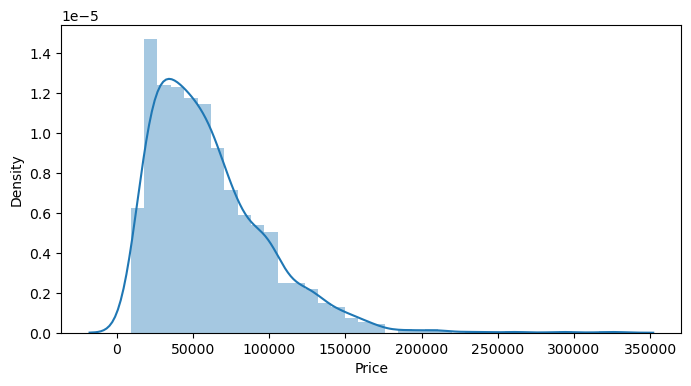

In [1996]:
plt.figure(figsize=(8,4))
sns.distplot(laptop_data['Price'])

<Axes: xlabel='Company'>

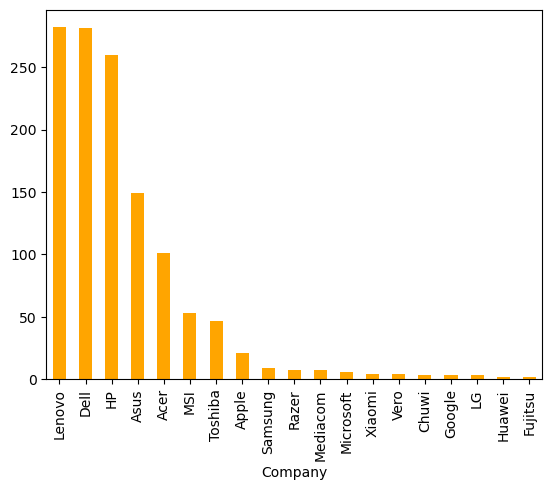

In [2002]:
laptop_data['Company'].value_counts().plot(kind='bar',color='orange')

### Type Name Counts

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Gaming'),
  Text(3, 0, '2 in 1 Convertible'),
  Text(4, 0, 'Workstation'),
  Text(5, 0, 'Netbook')])

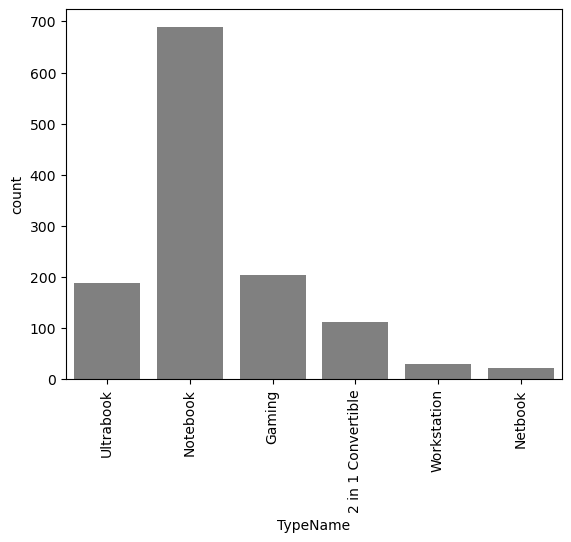

In [2005]:
sns.countplot(x=laptop_data['TypeName'],color='grey')
plt.xticks(rotation='vertical')

### Countplots of Ram and Operating System

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Windows 10 S'),
  Text(6, 0, 'Chrome OS'),
  Text(7, 0, 'Windows 7'),
  Text(8, 0, 'Android')])

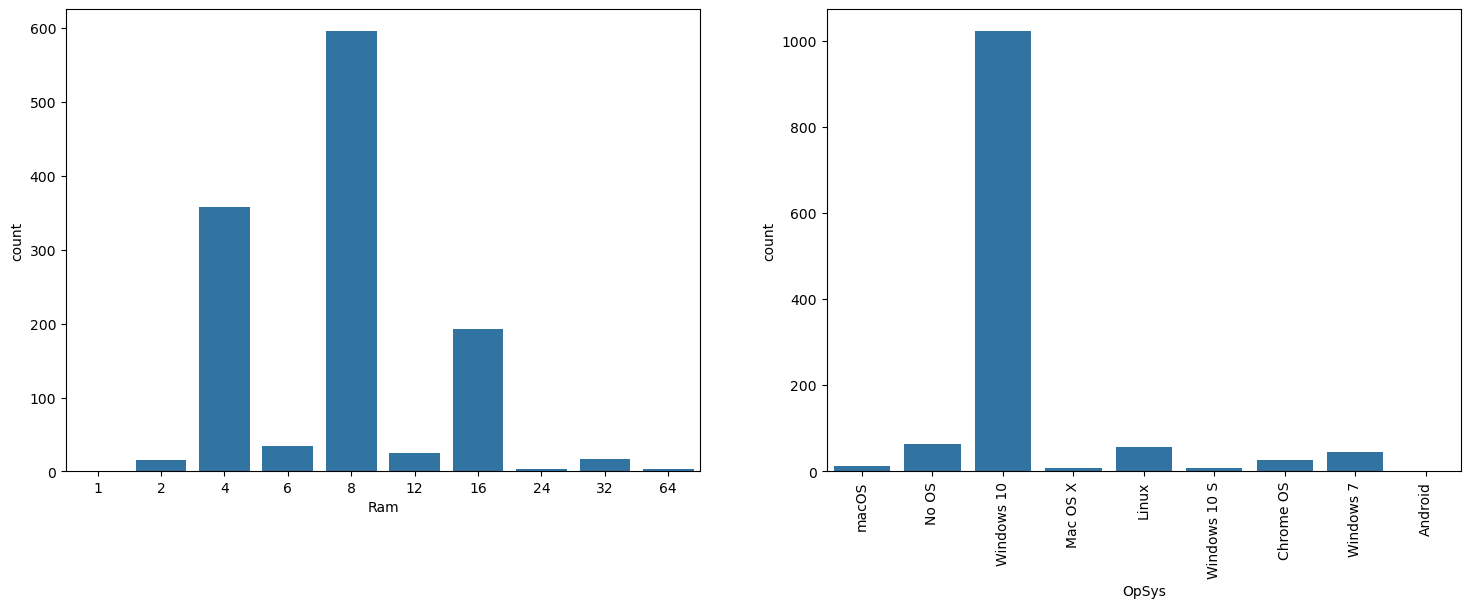

In [2009]:
fig,axes=plt.subplots(1,2,figsize=(18,6))
sns.countplot(x=laptop_data['Ram'],ax=axes[0])
sns.countplot(x=laptop_data['OpSys'],ax=axes[1])
plt.xticks(rotation='vertical')

### Barplots of Company and TypeName w.r.t Price

<Axes: xlabel='Price', ylabel='TypeName'>

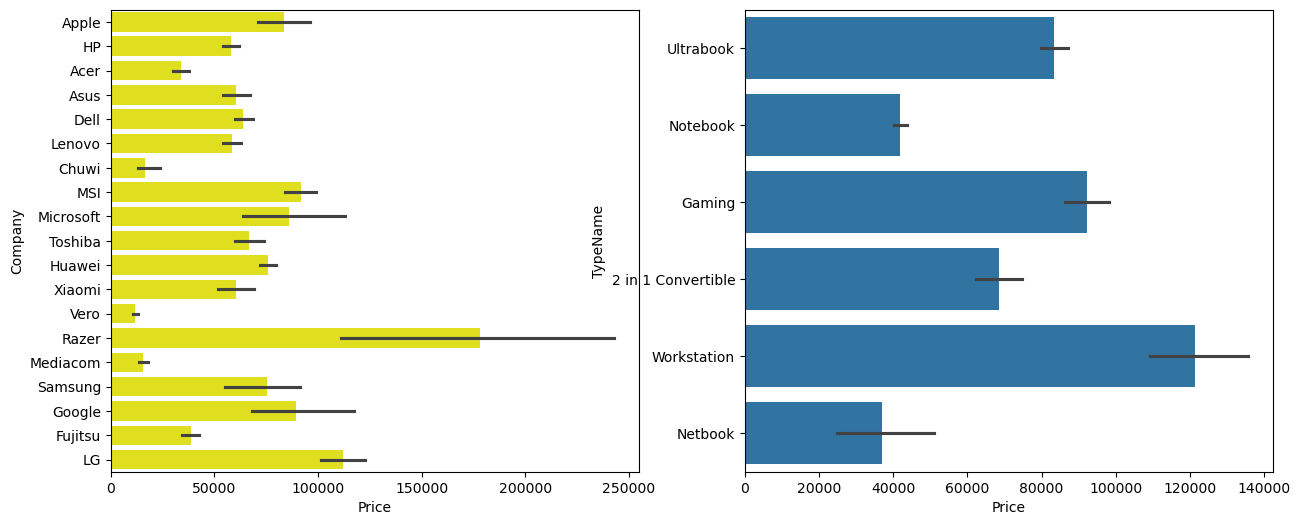

In [2015]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
sns.barplot(x=laptop_data['Price'],y=laptop_data['Company'],ax=axes[0],color='yellow')
sns.barplot(x=laptop_data['Price'],y=laptop_data['TypeName'],ax=axes[1])

### Barplot of Price vs Company

<Axes: xlabel='Price', ylabel='Company'>

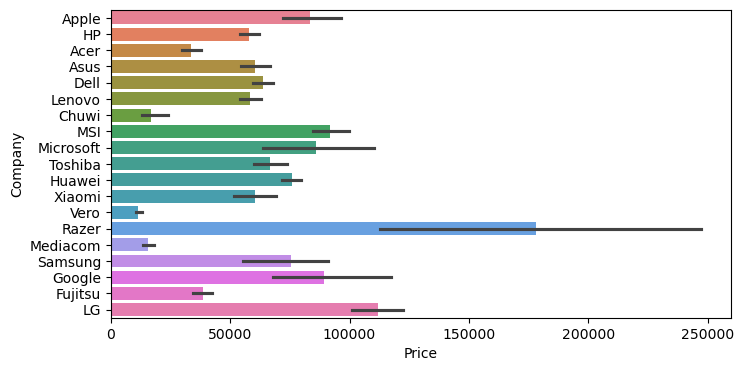

In [2038]:
plt.figure(figsize=(8,4))
sns.barplot(x=laptop_data['Price'],y=laptop_data['Company'],hue=laptop_data['Company'])

 ### Distribution plot of Inches column

<Axes: xlabel='Inches', ylabel='Density'>

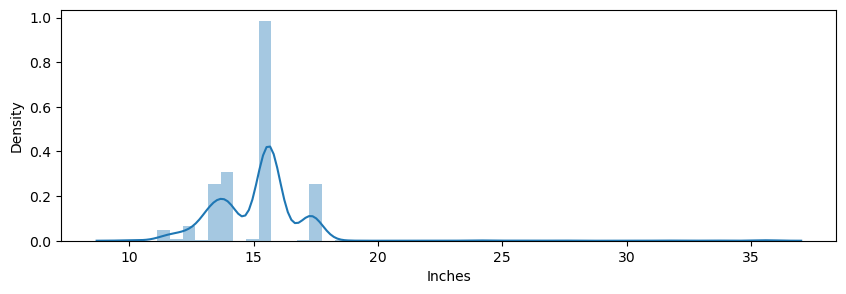

In [2041]:
plt.figure(figsize=(10,3))
sns.distplot(laptop_data['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

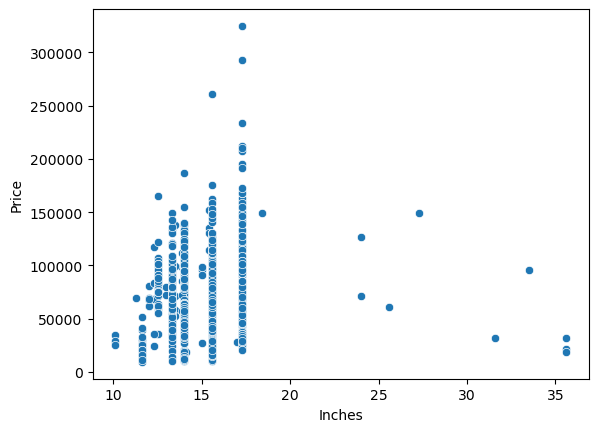

In [992]:
sns.scatterplot(x="Inches",y="Price",data=laptop_data)

In [2043]:
l=list(laptop_data['ScreenResolution'].unique())
l

['IPS Panel Retina Display 2560x1600',
 '1440x900',
 'Full HD 1920x1080',
 'IPS Panel Retina Display 2880x1800',
 '1366x768',
 'IPS Panel Full HD 1920x1080',
 'IPS Panel Retina Display 2304x1440',
 'IPS Panel Full HD / Touchscreen 1920x1080',
 'Full HD / Touchscreen 1920x1080',
 'Touchscreen / Quad HD+ 3200x1800',
 'Touchscreen 2256x1504',
 'Quad HD+ / Touchscreen 3200x1800',
 'IPS Panel 1366x768',
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
 'IPS Panel Full HD 2160x1440',
 '4K Ultra HD / Touchscreen 3840x2160',
 '1600x900',
 'IPS Panel 4K Ultra HD 3840x2160',
 '4K Ultra HD 3840x2160',
 'Touchscreen 1366x768',
 'Touchscreen 2560x1440',
 'IPS Panel Full HD 1366x768',
 'IPS Panel 2560x1440',
 'IPS Panel Full HD 2560x1440',
 'IPS Panel Retina Display 2736x1824',
 'Touchscreen 2400x1600',
 '2560x1440',
 'IPS Panel Quad HD+ 2560x1440',
 'IPS Panel Quad HD+ 3200x1800',
 'IPS Panel Quad HD+ / Touchscreen 3200x1800',
 'IPS Panel Touchscreen 1366x768',
 '1920x1080',
 'IPS Panel Full HD 19

### Creting new column 'Touch_Screen'

In [2050]:
laptop_data['Touch_Screen']=laptop_data['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [2052]:
laptop_data['Touch_Screen']

0       0
1       0
2       0
3       0
4       0
       ..
1269    0
1270    1
1271    1
1272    0
1273    0
Name: Touch_Screen, Length: 1244, dtype: int64

### CountPlots for Touch_screen and OpSys

<Axes: xlabel='Touch_Screen'>

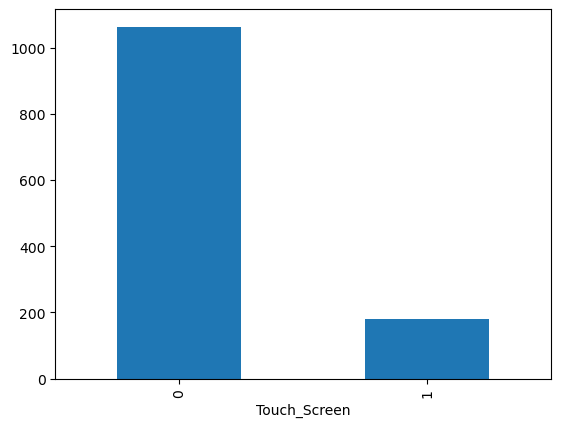

In [2057]:
laptop_data["Touch_Screen"].value_counts().plot(kind="bar")

<Axes: xlabel='count', ylabel='OpSys'>

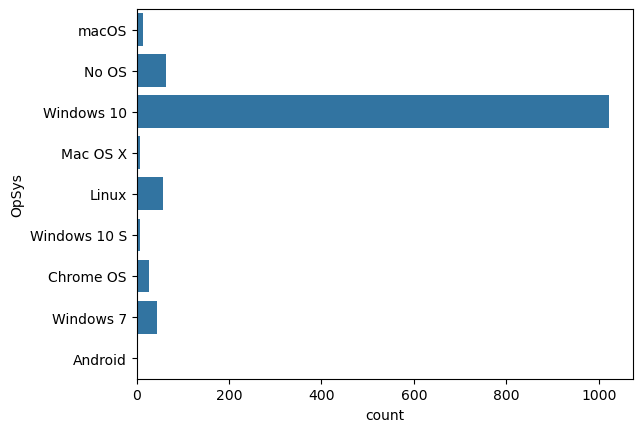

In [2059]:
sns.countplot(laptop_data['OpSys'])

In [2061]:
laptop_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


### Barplot for Touch_Screen vs Price

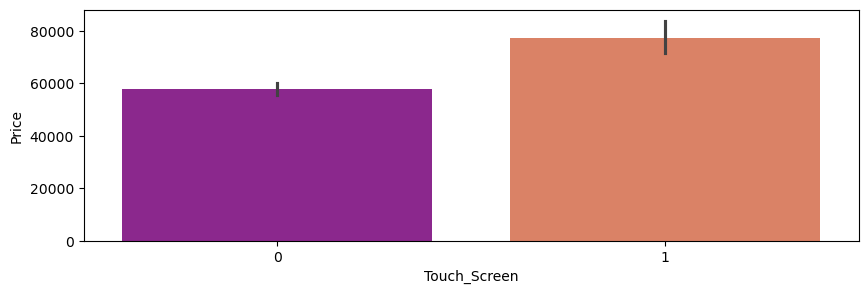

In [794]:
plt.figure(figsize=(10,3))
sns.barplot(x=laptop_data['Touch_Screen'],y=laptop_data['Price'],palette='plasma')
plt.show()

### Creating new column 'IPS'-

In [2064]:
laptop_data['IPS']=laptop_data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [2066]:
laptop_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


### Barplot of IPS vs Price

<Axes: xlabel='IPS', ylabel='Price'>

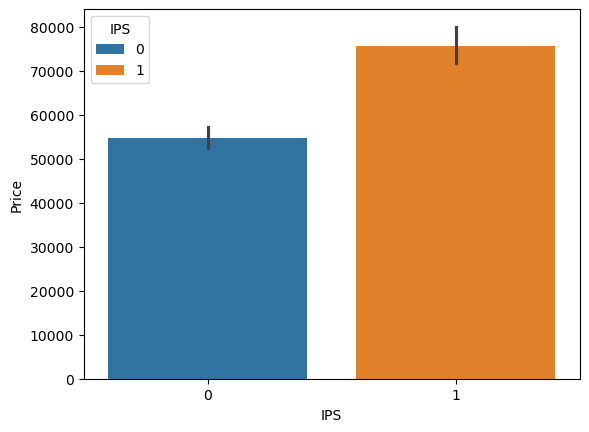

In [2074]:
sns.barplot(x=laptop_data['IPS'],y=laptop_data['Price'],hue=laptop_data['IPS'])

### Identifying X and Y Resolution values

In [2082]:
laptop_data['X_Y_Resolution']=laptop_data['ScreenResolution'].str.split().str[-1]

In [2084]:
laptop_data['X_Y_Resolution']

0       2560x1600
1        1440x900
2       1920x1080
3       2880x1800
4       2560x1600
          ...    
1269     1366x768
1270    1920x1080
1271    3200x1800
1272     1366x768
1273     1366x768
Name: X_Y_Resolution, Length: 1244, dtype: object

In [2086]:
laptop_data['resol']=laptop_data['X_Y_Resolution'].str.split('x')
laptop_data['resol']

0       [2560, 1600]
1        [1440, 900]
2       [1920, 1080]
3       [2880, 1800]
4       [2560, 1600]
            ...     
1269     [1366, 768]
1270    [1920, 1080]
1271    [3200, 1800]
1272     [1366, 768]
1273     [1366, 768]
Name: resol, Length: 1244, dtype: object

In [2088]:
laptop_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen,IPS,X_Y_Resolution,resol
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560x1600,"[2560, 1600]"
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440x900,"[1440, 900]"
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920x1080,"[1920, 1080]"
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880x1800,"[2880, 1800]"
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560x1600,"[2560, 1600]"


In [2090]:
x=[]
y=[]
for i in laptop_data['resol']:
    x.append(i[0])
    y.append(i[1])

In [2092]:
laptop_data['X']=x
laptop_data['Y']=y

In [2094]:
laptop_data.drop(columns=['X_Y_Resolution','resol'],inplace=True)

In [2096]:
laptop_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen,IPS,X,Y
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [2098]:
laptop_data['X']=laptop_data['X'].astype('int32')
laptop_data['Y']=laptop_data['Y'].astype('int32')

### Creating new column 'ppi'- pixels per inches

In [2103]:
laptop_data['ppi']=(((laptop_data['X']**2)+(laptop_data['Y']**2))**0.5/laptop_data['Inches']).astype('float')

In [2105]:
laptop_data['CPU_Name']=laptop_data['Cpu'].apply(lambda x: ' '.join(x.split()[0:3]))

In [2107]:
laptop_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen,IPS,X,Y,ppi,CPU_Name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5


In [2109]:
def processor_name(text):
    if text=='Intel Core i3' or text=='Intel Core i5' or text=='Intel Core i7':
        return text
    elif text.split()[0]=='Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'

In [2111]:
laptop_data['CPU Brand']=laptop_data['CPU_Name'].apply(processor_name)

In [2113]:
laptop_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen,IPS,X,Y,ppi,CPU_Name,CPU Brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5


### Countplot for CPU Brand

<Axes: xlabel='CPU Brand'>

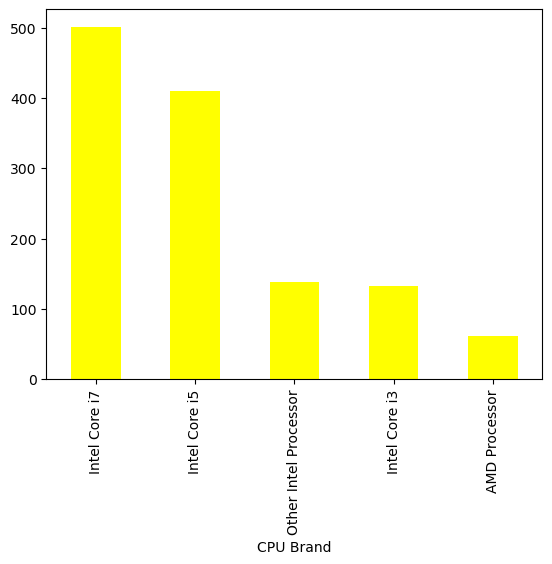

In [2331]:
laptop_data['CPU Brand'].value_counts().plot(kind='bar',color='yellow')

### Barplot of CPU Brand vs Price 

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

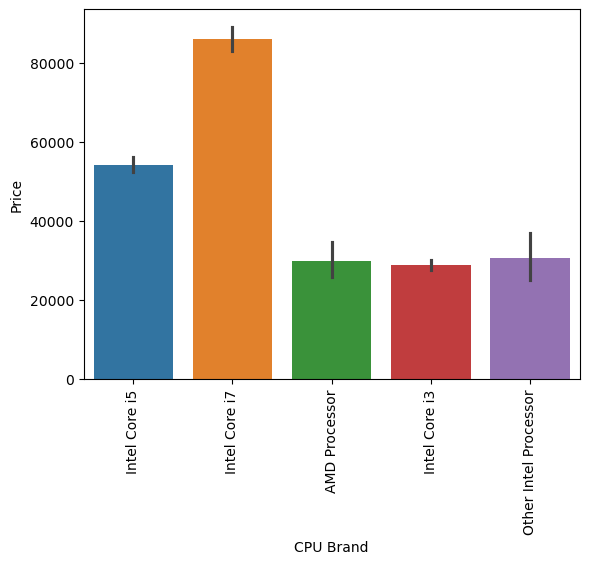

In [2123]:
sns.barplot(x=laptop_data['CPU Brand'],y=laptop_data['Price'],hue=laptop_data['CPU Brand'])
plt.xticks(rotation='vertical')

<Axes: xlabel='Ram', ylabel='Price'>

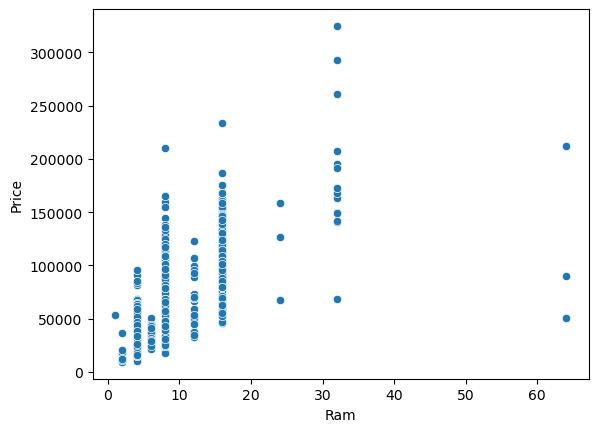

In [2125]:
sns.scatterplot(x=laptop_data['Ram'],y=laptop_data['Price'])

### Creating new columns HDD and SDD- Hard disk drive and Secondary Disk Drive

In [2127]:
laptop_data['Memory'].value_counts()

Memory
256GB SSD                        401
1TB HDD                          209
500GB HDD                        121
512GB SSD                        112
128GB SSD +  1TB HDD              92
128GB SSD                         72
256GB SSD +  1TB HDD              71
32GB Flash Storage                35
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           13
64GB Flash Storage                12
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [2136]:
laptop_data['HDD']=laptop_data['Memory'].apply(lambda x: x.split()[0] if 'HDD' in x else 0)
laptop_data['SDD']=laptop_data['Memory'].apply(lambda x: x.split()[0] if 'SSD' in x else 0)

In [2138]:
laptop_data['HDD'].unique()

array([0, '500GB', '1TB', '128GB', '256GB', '2TB', '512GB', '64GB',
       '32GB', '1.0TB'], dtype=object)

In [2140]:
laptop_data['SDD'].unique()

array(['128GB', 0, '256GB', '512GB', '32GB', '64GB', '1TB', '16GB',
       '180GB', '240GB', '8GB'], dtype=object)

In [2142]:
laptop_data['HDD']=laptop_data['HDD'].str.replace('GB','')
laptop_data['HDD']=laptop_data['HDD'].str.replace('TB','')
laptop_data['SDD']=laptop_data['SDD'].str.replace('GB','')
laptop_data['SDD']=laptop_data['SDD'].str.replace('TB','')

In [2144]:
laptop_data[['HDD','SDD']]=laptop_data[['HDD','SDD']].fillna(0)

In [2146]:
laptop_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen,IPS,X,Y,ppi,CPU_Name,CPU Brand,HDD,SDD
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5,0,128
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,Intel Core i5,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,Intel Core i5,0,256
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,Intel Core i7,0,512
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5,0,256


### Creating new column 'GPU' out of Gpu_Brand

In [2149]:
laptop_data['Gpu_Brand']=laptop_data['Gpu'].apply(lambda x: x.split()[0])

In [2151]:
laptop_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Touch_Screen,IPS,X,Y,ppi,CPU_Name,CPU Brand,HDD,SDD,Gpu_Brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,0,0,1440,900,127.677940,Intel Core i5,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,0,0,1920,1080,141.211998,Intel Core i5,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,...,0,1,2880,1800,220.534624,Intel Core i7,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5,0,256,Intel


In [2153]:
laptop_data['Gpu_Brand'].value_counts()

Gpu_Brand
Intel     684
Nvidia    389
AMD       170
ARM         1
Name: count, dtype: int64

<Axes: xlabel='Gpu_Brand', ylabel='Price'>

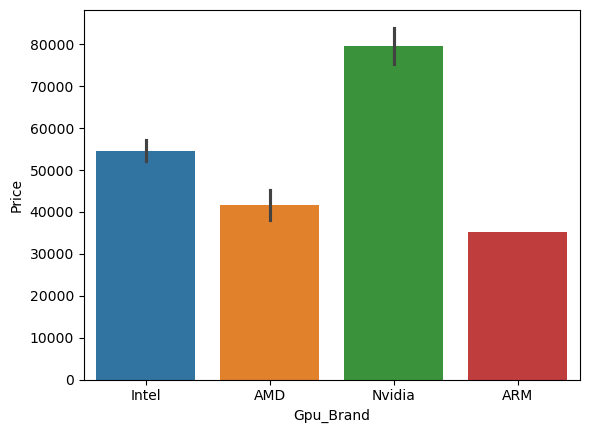

In [2155]:
sns.barplot(x=laptop_data['Gpu_Brand'],y=laptop_data['Price'],hue=laptop_data['Gpu_Brand'])

### Creating new column 'Op_Sys' for operating system name

In [2160]:
laptop_data['OpSys'].value_counts()

OpSys
Windows 10      1022
No OS             63
Linux             57
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [2162]:
def op_sys(text):
    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'
    elif text=='macOS' or text=='Mac OS X':
        return 'MacOs'
    else:
        return 'Others'

In [2164]:
laptop_data['Op_Sys']=laptop_data['OpSys'].apply(op_sys)

In [2166]:
laptop_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,IPS,X,Y,ppi,CPU_Name,CPU Brand,HDD,SDD,Gpu_Brand,Op_Sys
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,1,2560,1600,226.983005,Intel Core i5,Intel Core i5,0,128,Intel,MacOs
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,0,1440,900,127.677940,Intel Core i5,Intel Core i5,0,0,Intel,MacOs
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,0,1920,1080,141.211998,Intel Core i5,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,...,1,2880,1800,220.534624,Intel Core i7,Intel Core i7,0,512,AMD,MacOs
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,1,2560,1600,226.983005,Intel Core i5,Intel Core i5,0,256,Intel,MacOs


In [2168]:
laptop_data['Op_Sys'].value_counts()

Op_Sys
Windows    1075
Others      148
MacOs        21
Name: count, dtype: int64

### baplot for Opearting system and Price

<Axes: xlabel='Op_Sys', ylabel='Price'>

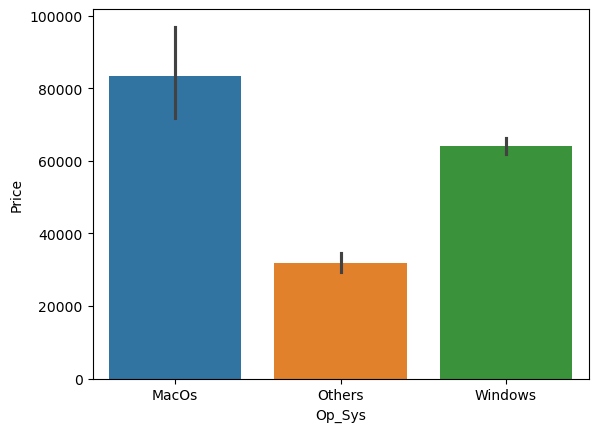

In [2173]:
sns.barplot(x=laptop_data['Op_Sys'],y=laptop_data['Price'],hue=laptop_data['Op_Sys'])

### Dropping unnecessary columns

In [2176]:
laptop_data.drop(columns=['Inches','CPU_Name','X','Y','OpSys','Gpu','Memory','Cpu','ScreenResolution'],inplace=True)

In [2178]:
laptop_data.head()

,Company,TypeName,Ram,Weight,Price,Touch_Screen,IPS,ppi,CPU Brand,HDD,SDD,Gpu_Brand,Op_Sys
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,MacOs
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,MacOs
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,MacOs
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,MacOs


In [2180]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1244 non-null   object 
 1   TypeName      1244 non-null   object 
 2   Ram           1244 non-null   int32  
 3   Weight        1243 non-null   float64
 4   Price         1244 non-null   float64
 5   Touch_Screen  1244 non-null   int64  
 6   IPS           1244 non-null   int64  
 7   ppi           1243 non-null   float64
 8   CPU Brand     1244 non-null   object 
 9   HDD           1244 non-null   object 
 10  SDD           1244 non-null   object 
 11  Gpu_Brand     1244 non-null   object 
 12  Op_Sys        1244 non-null   object 
dtypes: float64(3), int32(1), int64(2), object(7)
memory usage: 131.2+ KB


In [2182]:
laptop_data['Ram']=laptop_data['Ram'].astype('int32')
laptop_data['HDD']=laptop_data['HDD'].astype('float64')
laptop_data['SDD']=laptop_data['SDD'].astype('float64')

### Heatmap for numerical columns

<Axes: >

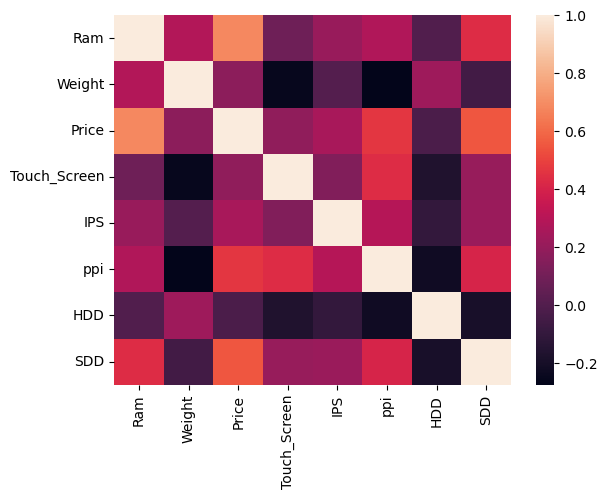

In [2329]:
sns.heatmap(laptop_data[['Ram','Weight','Price','Touch_Screen','IPS','ppi','HDD','SDD']].corr())

### Log Normalizing the target Price column

<Axes: xlabel='Price', ylabel='Density'>

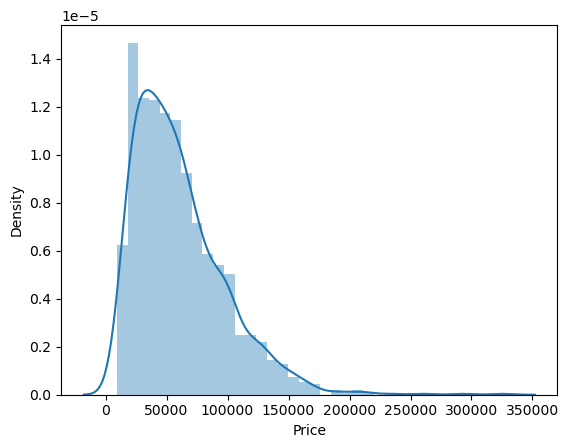

In [2188]:
sns.distplot(laptop_data['Price'])

<Axes: xlabel='Price', ylabel='Density'>

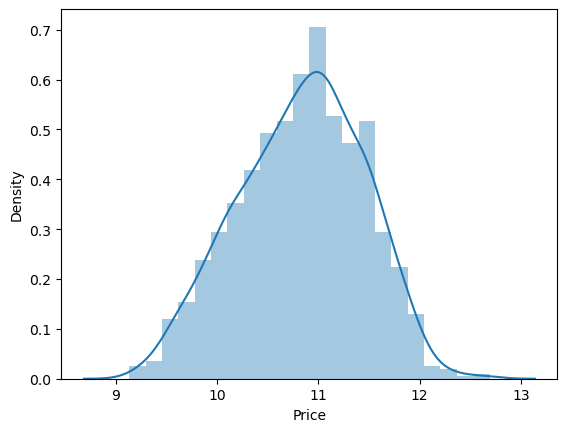

In [2190]:
sns.distplot(np.log(laptop_data['Price']))

## Model Building

### Splitting predictor and response variables

In [2193]:
laptop_data.dropna(inplace=True)
x=laptop_data.drop(columns=['Price'])
y=np.log(laptop_data['Price'])

In [2195]:
x.head(2)

,Company,TypeName,Ram,Weight,Touch_Screen,IPS,ppi,CPU Brand,HDD,SDD,Gpu_Brand,Op_Sys
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0.0,128.0,Intel,MacOs
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0.0,0.0,Intel,MacOs


In [2197]:
y.head(2)

0    11.175755
1    10.776777
Name: Price, dtype: float64

### Importing neccessary libraries and packages for Model Building

In [2202]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

### Linear Regression:

In [2205]:
categorical_columns=['Company','TypeName','CPU Brand','Gpu_Brand','Op_Sys']
CT=ColumnTransformer(transformers=[('encoder',OneHotEncoder(categories='auto'),[0,1,7,10,11])],remainder='passthrough')
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [2207]:
pipe1=Pipeline(steps=[('preprocessor',CT),("model",LinearRegression())])
pipe1.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  [0, 1, 7, 10, 11])])),
                ('model', LinearRegression())])

In [2209]:
y_pred1=pipe1.predict(x_test)

In [2211]:
print('r2 score:',r2_score(y_test,y_pred1))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred1))

r2 score: 0.8053951837064872
Mean Absolute Error: 0.20238869693675726


## KNeighbors Regressor

In [2214]:
pipe2=Pipeline(steps=[('preprocessor',CT),("model",KNeighborsRegressor(n_neighbors=3))])
pipe2.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  [0, 1, 7, 10, 11])])),
                ('model', KNeighborsRegressor(n_neighbors=3))])

In [2216]:
y_pred2=pipe2.predict(x_test)
print('r2 score:',r2_score(y_test,y_pred2))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred2))

r2 score: 0.6924925276936273
Mean Absolute Error: 0.2301838367694346


## Decision Tree Regressor

In [2275]:
pipe3=Pipeline(steps=[("preprocessor",CT),("model",DecisionTreeRegressor(max_depth=10))])
pipe3.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  [0, 1, 7, 10, 11])])),
                ('model', DecisionTreeRegressor(max_depth=10))])

In [2277]:
y_pred3=pipe.predict(x_test)
print('r2 score:',r2_score(y_test,y_pred3))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred3))

r2 score: 0.7297540627336752
Mean Absolute Error: 0.21671032970175091


## SVM

In [ ]:
pipe4=Pipeline(steps=[("preprocessor",CT),("model",SVR(kernel='linear'))])
pipe4.fit(x_train,y_train)

In [2226]:
y_pred4=pipe4.predict(x_test)
print('r2 score:',r2_score(y_test,y_pred4))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred4))

r2 score: 0.5666823324706787
Mean Absolute Error: 0.29811712441707616


## Random Forest Regressor

In [2229]:
pipe5=Pipeline(steps=[("preprocessor",CT),("model",RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,max_depth=15))])
pipe5.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  [0, 1, 7, 10, 11])])),
                ('model',
                 RandomForestRegressor(max_depth=15, max_features=0.75,
                                       max_samples=0.5, random_state=3))])

In [2230]:
y_pred5=pipe5.predict(x_test)
print('r2 score:',r2_score(y_test,y_pred5))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred5))

r2 score: 0.8744722762289967
Mean Absolute Error: 0.16045529548966464


### Lasso Regression

In [2289]:
pipe6=Pipeline(steps=[('preprocessor',CT),("model",Lasso(alpha=0.001))])
pipe6.fit(x_train,y_train)
y_pred6=pipe6.predict(x_test)
print('r2 score:',r2_score(y_test,y_pred6))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred6))

r2 score: 0.7914524623267687
Mean Absolute Error: 0.20661693155753183


In [2325]:
from sklearn.model_selection import cross_val_score

score_lr=cross_val_score(pipe2, x_train, y_train,cv=6,n_jobs=-1)
print(score_lr)
print("Avg :",np.mean(score_lr))

[0.7512038  0.79669026        nan 0.76535524 0.70687535        nan]
Avg : nan


## Prediction, R2_Score and Mean Absolute Error

In [2293]:
pred=[y_pred1, y_pred2, y_pred3, y_pred4, y_pred5,y_pred6]
r2score=[r2_score(y_test,i)*100 for i in pred ]

In [2294]:
#pred=[y_pred1, y_pred2, y_pred3, y_pred4, y_pred5]
mn_abs_err=[mean_absolute_error(y_test,i) for i in pred]

In [2295]:
data={"Mean Absolute Error":mn_abs_err,"R2_Score":r2score}

In [2300]:
def model_score():
    df=pd.DataFrame(data)
    df.index=['Linear Regression','K Neighbors','Decision Tree','SVM','Random Forest Regressor','Lasso Regression']
    df.columns=['Mean Absolute Error','R2_Score']
    return df

In [2302]:
model_score()

,Mean Absolute Error,R2_Score
Linear Regression,0.202389,80.539518
K Neighbors,0.230184,69.249253
Decision Tree,0.216710,72.975406
SVM,0.298117,56.668233
Random Forest Regressor,0.160455,87.447228
Lasso Regression,0.206617,79.145246
